<a href="https://colab.research.google.com/github/lovenalee/Final-Project/blob/master/MajCrimes(woDups).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install require package

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
# require dependencies

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

In [3]:
# bring in pyspark

import findspark
findspark.init()

In [4]:
# create pyspark session

from pyspark.sql import SparkSession
from pyspark.sql import functions as func
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("Basics").getOrCreate()

In [5]:
# identify data file

df = spark.read.csv("MCI_2014_to_2019.csv", sep=",", header=True, inferSchema=True)

In [6]:
# show data set

df.show(truncate=False)
df.count()

+-----------------+----------------+------+---------------+----------------------+----------------------+-----------+--------+-------+------------------------------+------------+-------------+-----------+-----------------+-----------------+------------+--------------+---------------+-------------+-------------------+-------------------+--------------+---------------+--------+-------+-------------------------------+----------+-------+--------+
|X                |Y               |Index_|event_unique_id|occurrencedate        |reporteddate          |premisetype|ucr_code|ucr_ext|offence                       |reportedyear|reportedmonth|reportedday|reporteddayofyear|reporteddayofweek|reportedhour|occurrenceyear|occurrencemonth|occurrenceday|occurrencedayofyear|occurrencedayofweek|occurrencehour|MCI            |Division|Hood_ID|Neighbourhood                  |Lat       |Long   |ObjectId|
+-----------------+----------------+------+---------------+----------------------+----------------------+-

206435

In [7]:
# check data type of data set

df.dtypes

[('X', 'double'),
 ('Y', 'double'),
 ('Index_', 'int'),
 ('event_unique_id', 'string'),
 ('occurrencedate', 'string'),
 ('reporteddate', 'string'),
 ('premisetype', 'string'),
 ('ucr_code', 'int'),
 ('ucr_ext', 'int'),
 ('offence', 'string'),
 ('reportedyear', 'int'),
 ('reportedmonth', 'string'),
 ('reportedday', 'int'),
 ('reporteddayofyear', 'int'),
 ('reporteddayofweek', 'string'),
 ('reportedhour', 'int'),
 ('occurrenceyear', 'int'),
 ('occurrencemonth', 'string'),
 ('occurrenceday', 'int'),
 ('occurrencedayofyear', 'int'),
 ('occurrencedayofweek', 'string'),
 ('occurrencehour', 'int'),
 ('MCI', 'string'),
 ('Division', 'string'),
 ('Hood_ID', 'int'),
 ('Neighbourhood', 'string'),
 ('Lat', 'double'),
 ('Long', 'double'),
 ('ObjectId', 'int')]

In [8]:
# inspect the duplicates rows

df \
    .groupby(['event_unique_id']) \
    .count() \
    .where('count > 1') \
    .sort('count', ascending=False) \
    .show()

+---------------+-----+
|event_unique_id|count|
+---------------+-----+
| GO-20151785704|   24|
|  GO-2015840772|   16|
| GO-20152031940|   12|
|  GO-2019817050|   12|
|   GO-201768934|   11|
| GO-20191159281|   11|
|   GO-201669300|   10|
| GO-20172020713|   10|
|  GO-2016666713|   10|
| GO-20161194129|   10|
| GO-20142573299|   10|
| GO-20182281596|   10|
|  GO-2018778601|   10|
| GO-20192432532|   10|
| GO-20192065321|    9|
| GO-20171696437|    9|
| GO-20173113787|    9|
| GO-20172057499|    8|
|  GO-2017747240|    8|
| GO-20192250808|    8|
+---------------+-----+
only showing top 20 rows



In [9]:
df1 = df.dropDuplicates(['event_unique_id'])
df1.count()

179813

In [24]:
df1.select("reporteddate").dtypes

[('reporteddate', 'string')]

In [25]:
# bring in pyspark dependencies for data munging

df2 = df1.withColumn('date_only', split(df1['reporteddate'], ' ').getItem(0))
df2.show(truncate=False)

+-----------------+----------------+------+---------------+----------------------+----------------------+-----------+--------+-------+----------------------+------------+-------------+-----------+-----------------+-----------------+------------+--------------+---------------+-------------+-------------------+-------------------+--------------+---------------+--------+-------+--------------------------------------+----------+-------+--------+----------+
|X                |Y               |Index_|event_unique_id|occurrencedate        |reporteddate          |premisetype|ucr_code|ucr_ext|offence               |reportedyear|reportedmonth|reportedday|reporteddayofyear|reporteddayofweek|reportedhour|occurrenceyear|occurrencemonth|occurrenceday|occurrencedayofyear|occurrencedayofweek|occurrencehour|MCI            |Division|Hood_ID|Neighbourhood                         |Lat       |Long   |ObjectId|date_only |
+-----------------+----------------+------+---------------+----------------------+----

In [29]:
# make unique record by grouping and counting each reported date in the 'reporteddate' field

grouped_df = df2.groupBy("date_only").count()
grouped_df.sort(func.col("date_only")).show(truncate=False)

+----------+-----+
|date_only |count|
+----------+-----+
|2014/01/01|89   |
|2014/01/02|58   |
|2014/01/03|52   |
|2014/01/04|55   |
|2014/01/05|63   |
|2014/01/06|64   |
|2014/01/07|75   |
|2014/01/08|73   |
|2014/01/09|78   |
|2014/01/10|61   |
|2014/01/11|55   |
|2014/01/12|78   |
|2014/01/13|73   |
|2014/01/14|77   |
|2014/01/15|62   |
|2014/01/16|69   |
|2014/01/17|83   |
|2014/01/18|82   |
|2014/01/19|65   |
|2014/01/20|69   |
+----------+-----+
only showing top 20 rows



In [30]:
# check to ensure duplicates are dropped

df2 \
    .groupby(['event_unique_id']) \
    .count() \
    .where('count > 1') \
    .sort('count', ascending=False) \
    .show()

+---------------+-----+
|event_unique_id|count|
+---------------+-----+
+---------------+-----+



In [31]:
grouped_df.count()

2191

In [32]:
# bring in pandas dependencies for data munging

import pandas as pd
import matplotlib.pyplot as plt

pandas_df = grouped_df.toPandas()
pandas_df.dtypes
pandas_df = pandas_df.rename(columns={"date_only": "ds", "count": "y"})
pandas_df['ds'] = pd.to_datetime(pandas_df['ds'], format='%Y-%m-%d')
pandas_df = pandas_df.sort_values(by=['ds'])
pandas_df = pandas_df.reset_index(drop=True)
pandas_df.head()

,ds,y
0,2014-01-01,89
1,2014-01-02,58
2,2014-01-03,52
3,2014-01-04,55
4,2014-01-05,63


In [33]:
# check pandas_df data type to ensure 'ds' is date format and check data for missing values

pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2191 non-null   datetime64[ns]
 1   y       2191 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.4 KB


In [34]:
print(pandas_df.shape[0], 'rows', 'AND', pandas_df.shape[1], 'columns')
print('Min Date', pandas_df.ds.min(), 'AND', 'Max Date', pandas_df.ds.max())

2191 rows AND 2 columns
Min Date 2014-01-01 00:00:00 AND Max Date 2019-12-31 00:00:00


In [35]:
# bring in prophet

from fbprophet import Prophet

model = Prophet()
model.fit(pandas_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# plot the data on 2 years predictions

future_df = model.make_future_dataframe(periods=730)

In [37]:
# data table with prediction yhat, lower and upper bounds (yhat_lower and yhat_upper), the trend, lower and upper trend values

predictions = model.predict(future_df)
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head(366)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2014-01-01,65.828797,52.948023,78.792301,75.732754,75.732754,75.732754
1,2014-01-02,66.057210,51.832111,78.501937,75.734985,75.734985,75.734985
2,2014-01-03,68.530537,54.864616,82.332626,75.737217,75.737217,75.737217
3,2014-01-04,63.456609,50.580527,77.378213,75.739448,75.739448,75.739448
4,2014-01-05,63.881617,51.048445,77.265674,75.741680,75.741680,75.741680
...,...,...,...,...,...,...,...
361,2014-12-28,62.299049,49.300759,75.350134,76.538305,76.538305,76.538305
362,2014-12-29,69.582538,57.037264,83.414958,76.540536,76.540536,76.540536
363,2014-12-30,66.866681,54.153783,79.963489,76.542768,76.542768,76.542768
364,2014-12-31,66.287650,52.926907,79.817876,76.544999,76.544999,76.544999


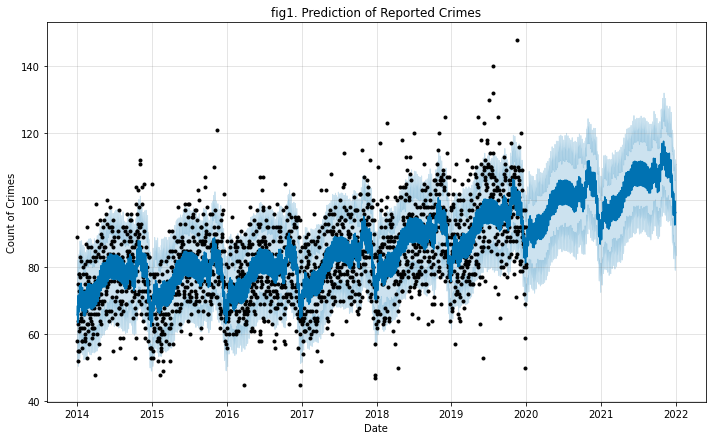

In [38]:
# plotting the predictions

fig1 = model.plot(predictions)
plt.title("fig1. Prediction of Reported Crimes")
plt.xlabel("Date")
plt.ylabel("Count of Crimes")
plt.show()

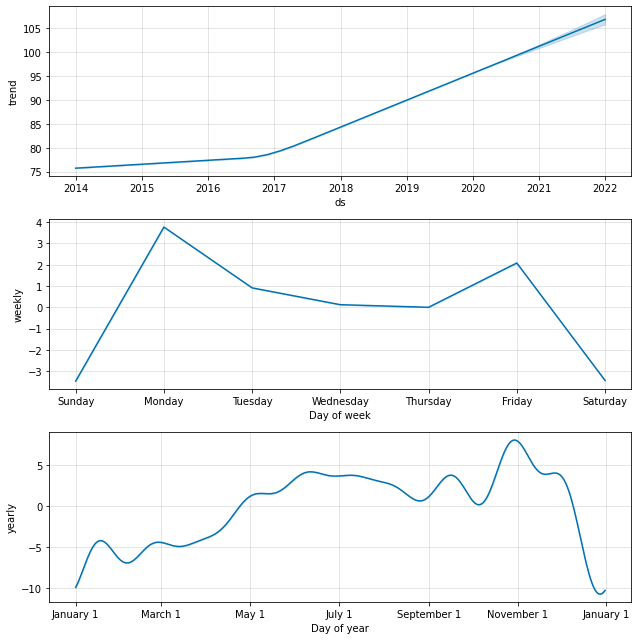

In [39]:
# plotting the prediction seasonality components

fig2 = model.plot_components(predictions)
plt.show()

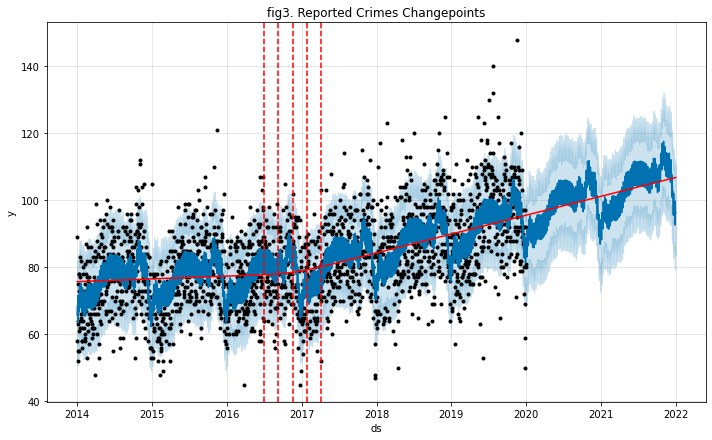

In [40]:
# plotting the changepoints of the data

from fbprophet.plot import add_changepoints_to_plot

fig3 = model.plot(predictions) 
a = add_changepoints_to_plot(fig3.gca(), model, predictions)
plt.title("fig3. Reported Crimes Changepoints")
plt.show()

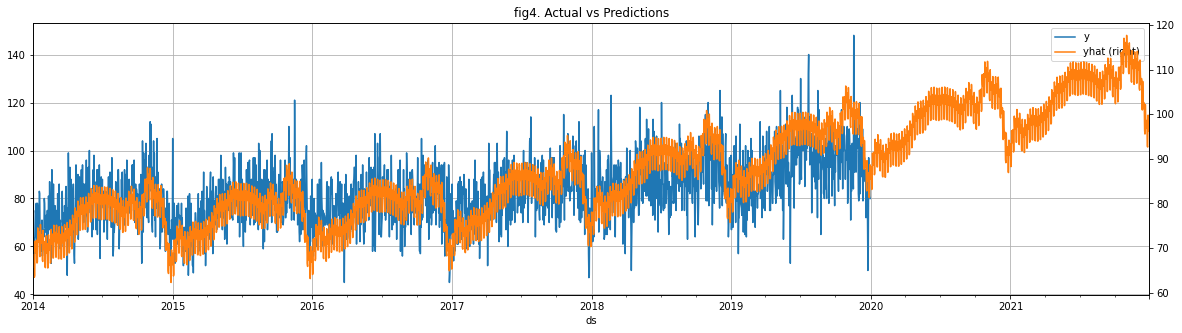

In [41]:
# plotting the actual and prediction values

fig4 = (pandas_df.plot(x='ds',y='y',figsize=(20,5)))
predictions.plot(x='ds',y='yhat',figsize=(20,5),title='fig4. Actual vs Predictions', grid=True, secondary_y=True, ax=fig4)
plt.show()